In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
num_steps = 10
ground_truth_xs = np.linspace(0,10,num=num_steps+1)
ground_truth_ys = ground_truth_xs.copy()

ground_truth_states = np.stack((ground_truth_xs,ground_truth_ys),axis=1)

x_0,y_0 = 0,0
motion_states = [np.array([x_0,y_0])]

u_t = np.array([1.0,1.0])

A = np.array([[1,0],[0,1]])

B = np.array([[1,0],[0,1]])

Q = np.array([[0.3,0],[0,0.3]])

for i in range(num_steps):
    motion_noise = np.random.multivariate_normal(mean=np.array([0,0]),cov=Q)
    new_state = A @ motion_states[-1] + B@u_t+motion_noise
    motion_states.append(new_state)

measurement_states = [np.array([x_0,y_0])]
H = np.array([[1,0],[0,1]])

R = np.array([[0.75,0],[0,0.6]])

In [65]:
for i in range(num_steps):
    measurement_noise = np.random.multivariate_normal(mean=np.array([0,0]),cov=R)
    new_measurement = H @ ground_truth_states[i+1] + measurement_noise
    measurement_states.append(new_measurement)
    
motion_states = np.array(motion_states)
measurement_states = np.array(measurement_states)

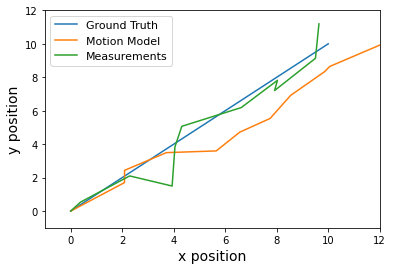

<Figure size 1440x1080 with 0 Axes>

In [66]:
plt.plot(ground_truth_states[:,0],ground_truth_states[:,1])
plt.plot(motion_states[:,0],motion_states[:,1])
plt.plot(measurement_states[:,0],measurement_states[:,1])

plt.xlim(-1,12)
plt.ylim(-1,12)

plt.xlabel('x position',fontdict={'fontsize':14})
plt.ylabel('y position',fontdict={'fontsize':14})

plt.legend(['Ground Truth','Motion Model','Measurements'],fontsize = '11')
plt.figure(figsize=(20,15))
plt.show()

In [67]:
def predict(A,B,Q,u_t,mu_t,Sigma_t):
    predicted_mu = A @ mu_t + B @ u_t
    predicted_Sigma = A @ Sigma_t @ A.T + Q
    return predicted_mu, predicted_Sigma

In [68]:
def update(H,R,Z,predicted_mu,predicted_Sigma):
    residual_mean = Z - H@predicted_mu
    residual_covariance = H@predicted_Sigma@H.T + R
    kalman_gain = predicted_Sigma@H.T@ np.linalg.inv(residual_covariance)
    updated_mu = predicted_mu + kalman_gain@residual_mean
    updated_Sigma = predicted_Sigma = kalman_gain
    return updated_mu,updated_Sigma

In [69]:
mu_0 = np.array([0,0])

Sigma_0 = np.array([[0.1,0],[0,0.1]])

u_t = np.array([1,1])

A = np.array([[1,0],[0,1]])

B = np.array([[1,0],[0,1]])

Q = np.array([[0.3,0],[0,0.3]])

H = np.array([[1,0],[0,1]])

R = np.array([[0.75,0],[0,0.76]])

In [70]:
measurement_states = []
filtered_states = []

In [71]:
mu_current = mu_0.copy()
Sigma_current = Sigma_0.copy()

In [72]:
for i in range(num_steps):
    predicted_mu,predicted_Sigma = predict(A,B,Q,u_t,mu_current,Sigma_current)
    measurement_noise = np.random.multivariate_normal(mean=np.array([0,0]),cov=R)
    new_measurement = H @ ground_truth_states[i+1] + measurement_noise
    
    mu_current,Sigma_current = update(H,R,new_measurement,predicted_mu,predicted_Sigma)

    measurement_states.append(new_measurement)
    filtered_states.append(mu_current)

In [73]:
measurement_states = np.array(measurement_states)
filtered_states = np.array(filtered_states)

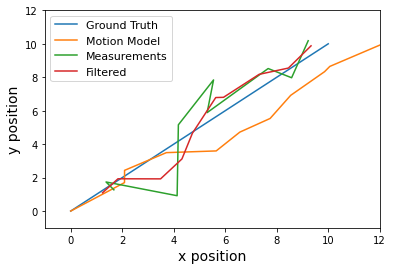

<Figure size 2160x1080 with 0 Axes>

In [74]:

plt.plot(ground_truth_states[:,0],ground_truth_states[:,1])
plt.plot(motion_states[:,0],motion_states[:,1])
plt.plot(measurement_states[:,0],measurement_states[:,1])
plt.plot(filtered_states[:,0],filtered_states[:,1])

plt.xlim(-1,12)
plt.ylim(-1,12)

plt.xlabel('x position',fontdict={'fontsize':14})
plt.ylabel('y position',fontdict={'fontsize':14})

plt.legend(['Ground Truth','Motion Model','Measurements','Filtered'],fontsize = '11')

plt.figure(figsize=(30,15))
plt.show()